In [2]:
import lightkurve as lk

import matplotlib.pyplot as plt
import numpy as np

# Search for data

We will have a look at TESS data. lightcurvefiles and targetpixelfiles only exist for a list of preselected targets like beta Pic. Those are being observed with short cadence (2 min).
If you want to extract a light curve for non short cadence stars, you have to use TESScut (later...).

In [3]:
name = 'beta Pic'

In [4]:
search_results = lk.search_lightcurvefile(name)

In [5]:
search_results

SearchResult containing 4 data products.

target_name                     productFilename                     description  distance
----------- ------------------------------------------------------- ------------ --------
  270577175 tess2018292075959-s0004-0000000270577175-0124-s_lc.fits Light curves      0.0
  270577175 tess2018319095959-s0005-0000000270577175-0125-s_lc.fits Light curves      0.0
  270577175 tess2018349182459-s0006-0000000270577175-0126-s_lc.fits Light curves      0.0
  270577175 tess2019006130736-s0007-0000000270577175-0131-s_lc.fits Light curves      0.0

You see, we have 4 sectors of data

In [6]:
lcs = search_results.download_all()

In [7]:
lcs

LightCurveFileCollection of 4 objects:
TessLightCurveFile(TICID: 270577175) 
TessLightCurveFile(TICID: 270577175) 
TessLightCurveFile(TICID: 270577175) 
TessLightCurveFile(TICID: 270577175) 

## Let's plot the first beta Pic sector

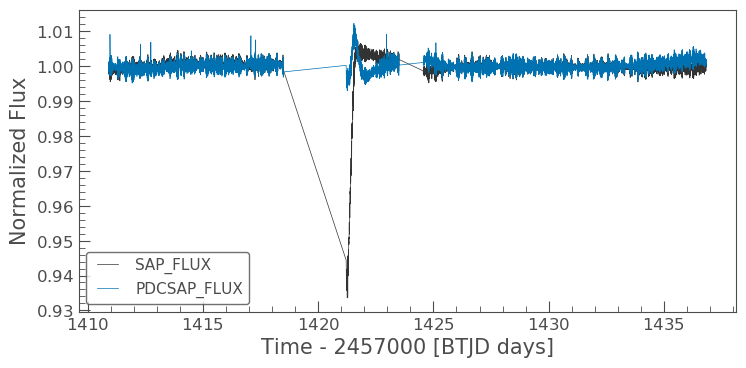

In [8]:
lcs[0].plot()

The SAP_FLUX is the "raw" Simple Aperture Photometry data. The PDCSAP_FLUX is the light curve, reduced by the SPOC  pipeline at NASA AMES. Usally it should be "better".

The big feature between BTJD 1421 and BTJD1424 is caused by instrumental issues during this time.

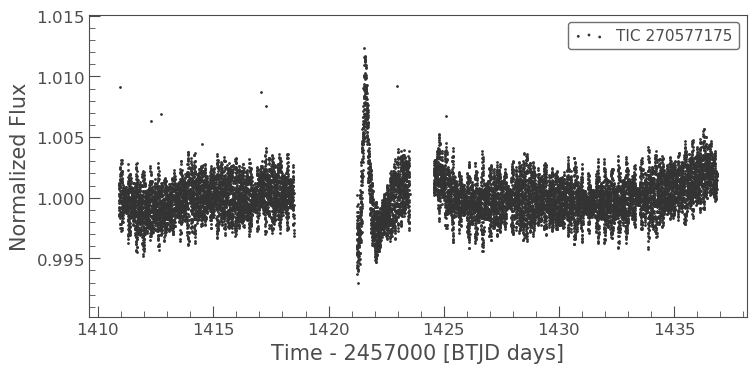

In [9]:
lcs[0].PDCSAP_FLUX.scatter()

The few outliers are also created by instr. issiues. They are mark with non zero values in the quality list:

In [11]:
lcs[0].PDCSAP_FLUX.quality

array([ 0,  0,  0, ..., 16, 16, 16], dtype=int32)

Let's remove those measurements with non zero quality values

In [12]:
quality_mask_0 = lcs[0].PDCSAP_FLUX.quality == 0

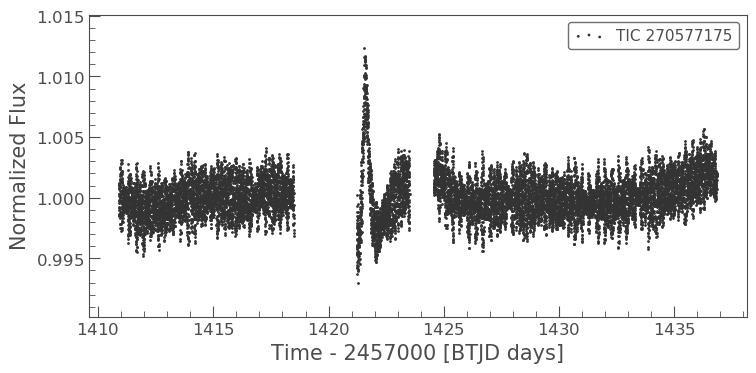

In [15]:
lcs[0].PDCSAP_FLUX[quality_mask_0].scatter()

# Target Pixel Files

In [17]:
tpfs_search_results = lk.search_targetpixelfile(name)

In [18]:
tpfs_search_results

SearchResult containing 4 data products.

target_name                     productFilename                        description     distance
----------- ------------------------------------------------------- ------------------ --------
  270577175 tess2018292075959-s0004-0000000270577175-0124-s_tp.fits Target pixel files      0.0
  270577175 tess2018319095959-s0005-0000000270577175-0125-s_tp.fits Target pixel files      0.0
  270577175 tess2018349182459-s0006-0000000270577175-0126-s_tp.fits Target pixel files      0.0
  270577175 tess2019006130736-s0007-0000000270577175-0131-s_tp.fits Target pixel files      0.0

In [19]:
tpfs = tpfs_search_results.download_all()

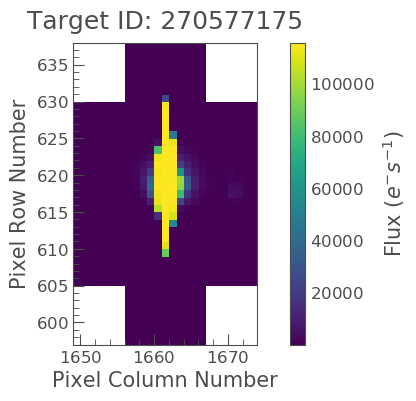

In [25]:
tpfs[2].plot()

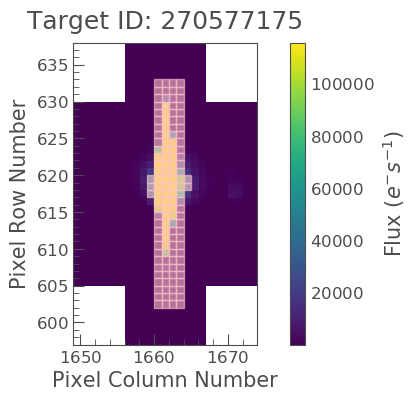

In [39]:
tpfs[2].plot(aperture_mask=tpfs[2].pipeline_mask)

In [49]:
tpfs[2].interact()

In [30]:
tpfs[2].pipeline_mask

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [28]:
tpfs[2].interact_sky(magnitude_limit = 13)

# Combine light curves

In [31]:
lc = lcs[0].PDCSAP_FLUX.normalize()

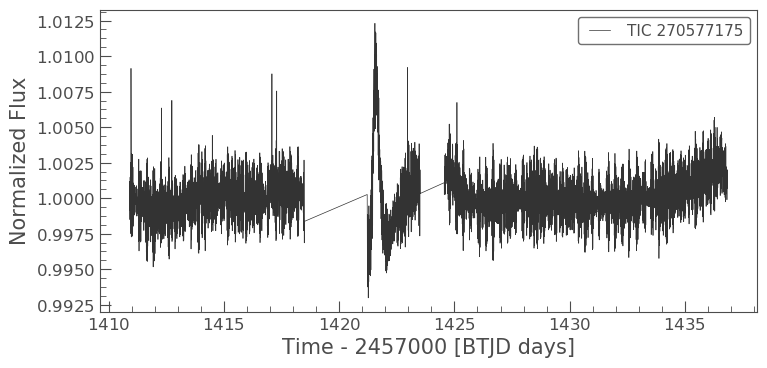

In [32]:
lc.plot()

In [35]:
for i in range(1, 4):
    lc = lc.append(lcs[i].PDCSAP_FLUX.normalize())

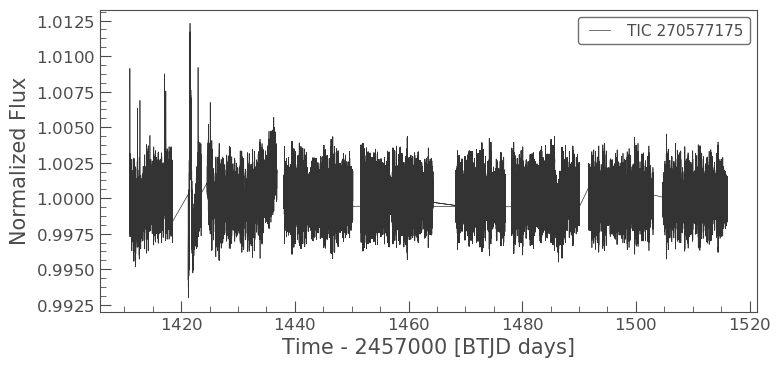

In [36]:
lc.plot()

In [40]:
lc.time

array([1410.90352425, 1410.90491317, 1410.90630209, ..., 1516.08417223,
       1516.08556108, 1516.08694993])

In [41]:
lc.flux

array([0.99917215, 0.9997671 , 1.0002863 , ..., 0.99864167, 0.9990074 ,
       0.99981487], dtype=float32)

In [50]:
lc.quality 

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [52]:
quality_mask = lc.quality == 0

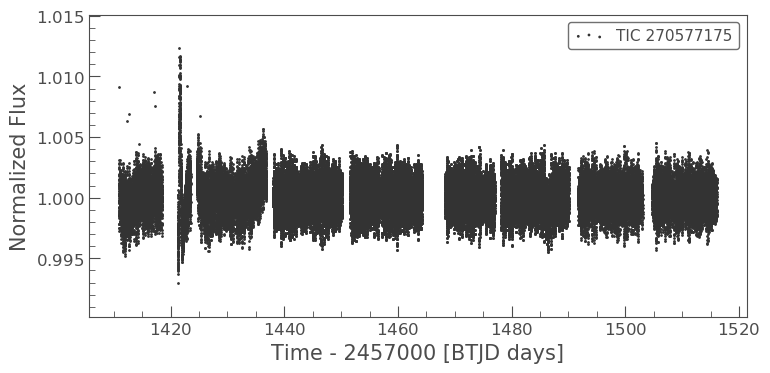

In [58]:
lc.scatter()

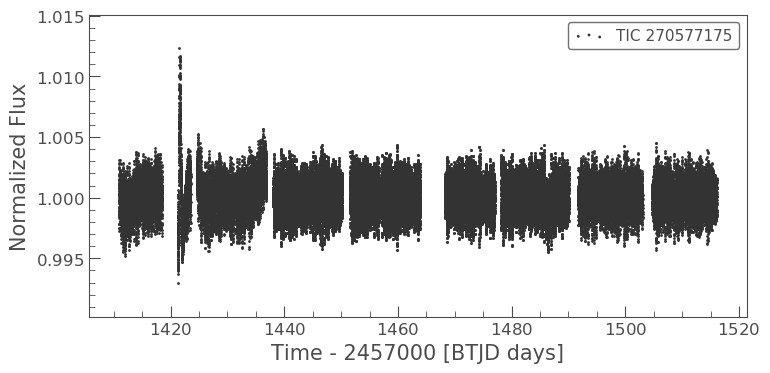

In [57]:
lc[quality_mask].scatter()

# binning

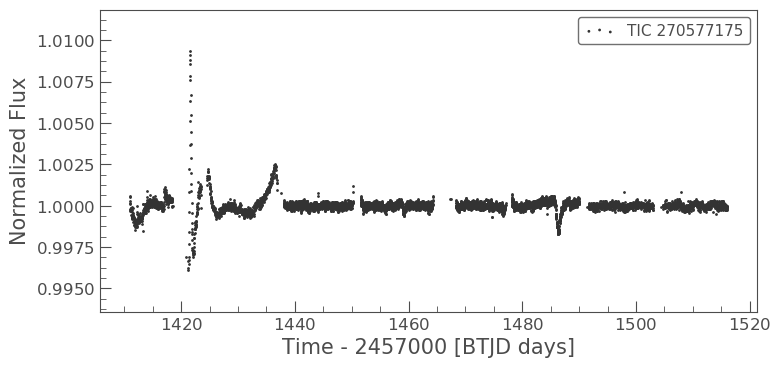

In [38]:
lc.bin(15).scatter()

(0.997, 1.0025)

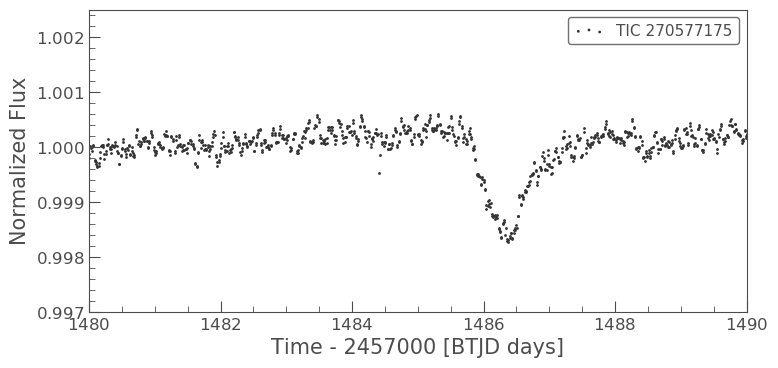

In [46]:
lc.bin(15).scatter()
plt.xlim(1480, 1490)
plt.ylim(0.997, 1.0025)

# stars in the vicinity ? 

In [48]:
vicinity_stars = lk.search_lightcurvefile(name, radius = 1000)
vicinity_stars

SearchResult containing 11 data products.

target_name                     productFilename                     description      distance    
----------- ------------------------------------------------------- ------------ ----------------
  270577175 tess2018292075959-s0004-0000000270577175-0124-s_lc.fits Light curves              0.0
  270577175 tess2018319095959-s0005-0000000270577175-0125-s_lc.fits Light curves              0.0
  270577175 tess2018349182459-s0006-0000000270577175-0126-s_lc.fits Light curves              0.0
  270577175 tess2019006130736-s0007-0000000270577175-0131-s_lc.fits Light curves              0.0
  270574544 tess2018292075959-s0004-0000000270574544-0124-s_lc.fits Light curves 810.286374455406
  270574544 tess2018319095959-s0005-0000000270574544-0125-s_lc.fits Light curves 810.286374455406
  270574544 tess2018349182459-s0006-0000000270574544-0126-s_lc.fits Light curves 810.286374455406
  270574544 tess2019006130736-s0007-0000000270574544-0131-s_lc.fits Light c

# Everything at the same time

Target Pixel File(s)
Search results:
SearchResult containing 1 data products.

target_name                     productFilename                        description     distance
----------- ------------------------------------------------------- ------------------ --------
  289592423 tess2018234235059-s0002-0000000289592423-0121-s_tp.fits Target pixel files      0.0
Only 1 sector available

 Light curve file(s)
Search results:
SearchResult containing 1 data products.

target_name                     productFilename                     description  distance
----------- ------------------------------------------------------- ------------ --------
  289592423 tess2018234235059-s0002-0000000289592423-0121-s_lc.fits Light curves      0.0
Only 1 sector available


IndexError: too many indices for array

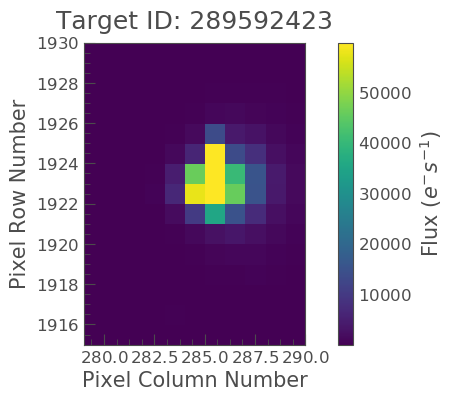

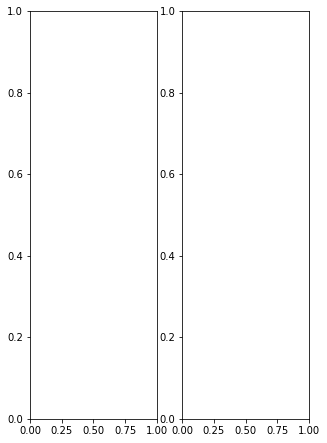

In [33]:
name = 'HR 10'

print('Target Pixel File(s)')

search_tpf = lk.search_targetpixelfile(name)
print('Search results:')
print(search_tpf)
tpfs = search_tpf.download_all()

if len(tpfs) ==1:
    print('Only 1 sector available')
    
    tpfs[0].plot()
    
    
elif len(tpfs) > 1:
    print('more than 1 Sector available')

    
    # Using matplotlib.pyplot's subplots method we can create a plot that has three panels 
    fig, axs = plt.subplots(1, 4, figsize=(20, 4))

    # Loop through the aperture masks
    for idx, tpf in enumerate(tpfs):
    # Use lightkurve to plot each tpf with each mask.
        tpf.plot(ax=axs[idx], aperture_mask=tpf.pipeline_mask)
    
elif len(tpfs) == 0:
    print('No short cadence data available')

    
print('\n Light curve file(s)')


search_lc = lk.search_lightcurvefile(name)
print('Search results:')
print(search_lc)
lcs = search_lc.download_all()
    
    
if len(lcs) ==1:
    print('Only 1 sector available')
    
    fig, axs = plt.subplots(1, 2, figsize=(20*len(lcs)/4, 30*len(lcs)/4))
    
    for idx, lc in enumerate(lcs):
    # Use lightkurve to plot each tpf with each mask.
        lc.plot(ax=axs[idx, 0])
        lc.PDCSAP_FLUX.bin(15).scatter(ax=axs[idx, 1])
    
    #lcs[0].plot()
    #lcs[0].scatter(ax=axs[0,1])
    
    
elif len(lcs) > 1:
    print('more than 1 Sector available')

    
    # Using matplotlib.pyplot's subplots method we can create a plot that has three panels 
    fig, axs = plt.subplots(len(lcs), 2, figsize=(20*4/len(lcs), 30*4/len(lcs)))

    
    
    # Loop through the aperture masks
    for idx, lc in enumerate(lcs):
    # Use lightkurve to plot each tpf with each mask.
        lc.plot(ax=axs[idx, 0])
        lc.PDCSAP_FLUX.bin(15).scatter(ax=axs[idx, 1])
    
elif len(lcs) == 0:
    print('No short cadence data available')

In [34]:
len(lcs)

1